# Biodiversity Project

# Introduction
In this project I will be a biodiversity analyst working for the National Parks Service. I am going to help them analyze some data about species at various national parks.


Import the modules:


In [195]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Load the dataset and inspect it:


In [196]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Let's start by learning a bit more about our data.

How many different species are in the `species` DataFrame?

In [197]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


What are the different values of `category` in `species`?

In [198]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")
species.groupby('category').size()

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

What are the different values of `conservation_status`?

In [199]:
print(f"unique conservation statuses:{species.conservation_status.unique()}")
print(f'number of unique conservations: {species.conservation_status.nunique()}')


unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
number of unique conservations: 4


The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

I want to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [200]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.


In [201]:
species.fillna('No Intervention', inplace=True)

Check how many species require `No Intervention`.

In [202]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Let's create a bar chart and sort the columns by how many species are in each categories.

In [203]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')

print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


Two types of Bar chart

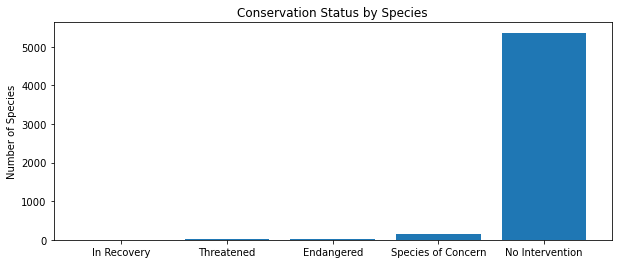

In [204]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

Now lets focus more on these which are not `No Intervention`

In [205]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Grouped bar comparing each `category`

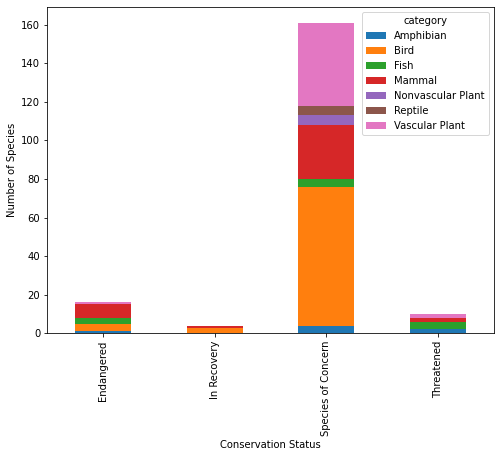

In [206]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [207]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Let's group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name's` in each grouping.


In [208]:
category_counts = species.groupby(['category', 'is_protected'])\
                         .scientific_name.nunique().reset_index()

Examine `category_counts`

In [209]:
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


It's going to be easier to view this data if we pivot it.

In [210]:
category_pivot = category_counts.pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                                .reset_index()

Examine `category_pivot`.

In [211]:
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Use the `.columns` property to  rename the categories `True` and `False` to something more description:

In [212]:
category_pivot.columns = ['category', 'not_protected', 'protected']
print(category_pivot)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species) and format their number to 2 decimals.

In [213]:
category_pivot['percent_protected'] = category_pivot.protected / \
                                      (category_pivot.protected + category_pivot.not_protected)
category_pivot.loc[:, "percent_protected"] = category_pivot["percent_protected"].map('{:,.2%}'.format)

Examine `category_pivot`.

In [214]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86%
1,Bird,413,75,15.37%
2,Fish,115,11,8.73%
3,Mammal,146,30,17.05%
4,Nonvascular Plant,328,5,1.50%
5,Reptile,73,5,6.41%
6,Vascular Plant,4216,46,1.08%


It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  I am going to do a significance test to see if this statement is true.

- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, I choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table look like this:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

Create a table called `contingency` and fill it in with the correct numbers

In [215]:
contingency = [[30, 146],
              [75, 413]]

In order to perform our chi square test, we'll need to import the correct function from scipy.


In [216]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [217]:
chi2_contingency(contingency)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent.

It looks like this difference isn't significant


Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Reptile|5|73|


In [218]:
contingency = [[30, 146],
               [5, 73]]
chi2_contingency(contingency)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

It looks like there is a significant difference between `Reptile` and `Mammal`

# Observations

Conservationists have been recording sightings of different species at several national parks for the past 7 days.

In [219]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.

In [220]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [221]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [222]:
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [223]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [224]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [225]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


How many total sheep observations (across all three species) were made at each national park?

This is the total number of sheep observed in each park over the past 7 days.

In [226]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index().sort_values(by='observations')
obs_by_park

,park_name,observations
1,Great Smoky Mountains National Park,149
0,Bryce National Park,250
3,Yosemite National Park,282
2,Yellowstone National Park,507


Create a bar chart showing the different number of observations per week at each park.


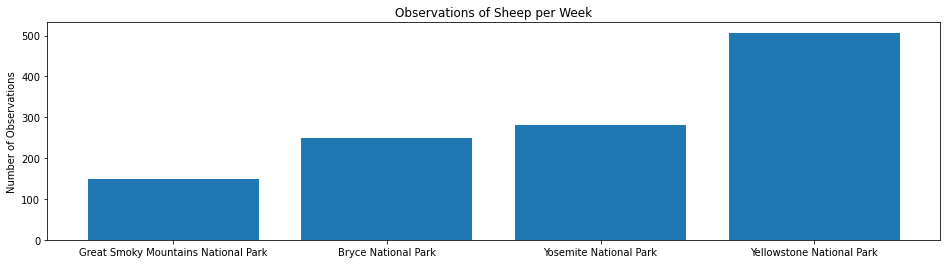

In [227]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)),
        obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.show()

According to obtained data, scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage point.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the sample size calculator to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

"Minimum Detectable Effect" is a percent of the baseline.

In [228]:
minimum_detectable_effect = 100 * 0.05 / 0.15
minimum_detectable_effect

33.333333333333336

In [229]:
baseline = 15

In [230]:
sample_size_per_variant = 870
# Note: This could be 890 if you used 33% for the "Minimum Detectable Effect" instead of 33.33%.  That's fine.

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [231]:
bryce = '{:.2f}'.format(870 / 250)
yellowstone = '{:.2f}'.format(810 / 507)


print(f'Approximately {bryce} weeks at Bryce and {yellowstone} weeks at Yellowstone.')

Approximately 3.48 weeks at Bryce and 1.60 weeks at Yellowstone.


# Species in Park


The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [232]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [233]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list for easier use.

In [234]:
clean = []

for sublist in cleanRows:
    for item in sublist:
        clean.append(item)

print(clean[:6])


['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']


Now the data is ready to be able to count the number of occurrences of each word.

In [235]:
count_words = []

for item in clean:
    x = clean.count(item)
    count_words.append((item, x))

df = pd.DataFrame(set(count_words), columns=['specie', 'count']).sort_values(by='count', ascending=False).head
df


<bound method NDFrame.head of         specie  count
172        Bat     23
98       Shrew     18
188     Myotis     17
153      Mouse     16
145   Chipmunk     13
..         ...    ...
126  StarNosed      1
60         Man      1
123     Canada      1
122  Chickaree      1
203       Goat      1

[204 rows x 2 columns]>

In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [236]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

print(species.value_counts('is_bat'))

species[species.is_bat]

is_bat
False    5801
True       23
dtype: int64


,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,False,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,False,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,False,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,False,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,False,True


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [237]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,False,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,False,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,False,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,False,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True


Let's see how many total bat observations(across all species) were made at each national park.  


In [238]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [239]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a plot from the output of the last data manipulation. Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.

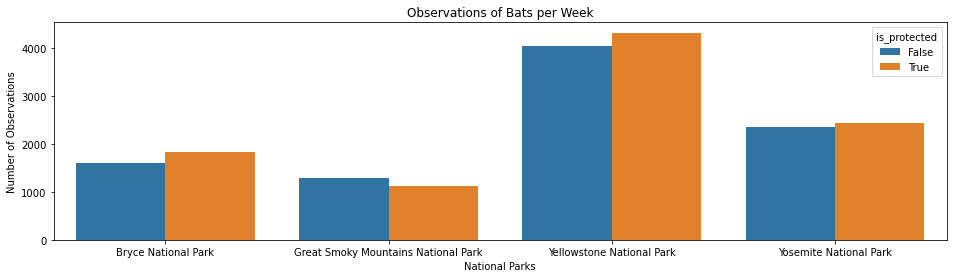

In [240]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.